In [2]:
import pandas as pd
from top2vec import Top2Vec

In [12]:
papers = pd.read_csv("data\papers.csv")
model = Top2Vec(
    documents=papers.abstract.dropna().to_list(),
    embedding_model="doc2vec",
    speed="fast-learn",
    workers=10,
    umap_args={"min_dist": 0, "densmap": True, "unique": True},
)

2021-12-25 01:25:59,199 - top2vec - INFO - Pre-processing documents for training
2021-12-25 01:26:01,524 - top2vec - INFO - Creating joint document/word embedding
2021-12-25 01:26:29,082 - top2vec - INFO - Creating lower dimension embedding of documents
2021-12-25 01:26:45,817 - top2vec - INFO - Finding dense areas of documents
2021-12-25 01:26:46,300 - top2vec - INFO - Finding topics


In [6]:
len(papers)

9680

In [19]:
topic_words, word_scores, topic_nums = model.get_topics()

In [20]:
topic_words[:, :6]

array([['which', 'for', 'we', 'optimization', 'also', 'our'],
       ['latent', 'neural', 'layer', 'recurrent', 'representations',
        'modeling'],
       ['neurons', 'brain', 'cortical', 'activity', 'neuronal',
        'neuroscience'],
       ['regret', 'bound', 'sqrt', 'bounds', 'bandit', 'armed'],
       ['recovery', 'entries', 'matrix', 'rank', 'norm', 'recovering'],
       ['privacy', 'differentially', 'private', 'differential',
        'guarantees', 'give']], dtype='<U15')

In [21]:
import umap.plot

umap_args_model = {
    "n_neighbors": 50,
    "n_components": 2,
    "densmap": True,
    "metric": "cosine",
    "unique": True,
    # 'min_dist': 0,
    # 'spread': 1
}
umap_model = umap.UMAP(**umap_args_model).fit(X=model._get_document_vectors(norm=False))

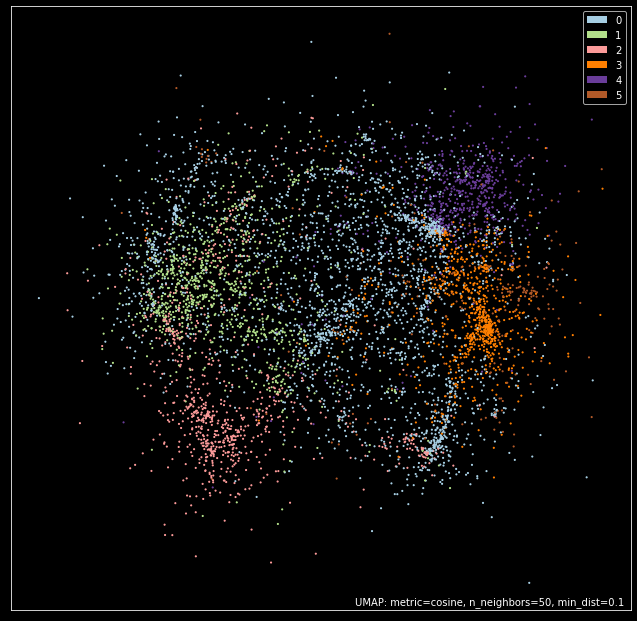

In [22]:
umap_fig2 = umap.plot.points(
    umap_model, labels=model.doc_top, color_key_cmap="Paired", background="black"
)

In [26]:
model._get_document_ids()

6